# CS306: Data Analysis and Visualization
# Project


data_academic_performance = De La Hoz, Enrique (2020), “Data of Academic Performance evolution for Engineering Students”, Mendeley Data, V1, doi: 10.17632/83tcx8psxv.1

In [ ]:
import scipy.stats as stats
from scipy.stats import kurtosis, skew
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import norm
import random
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from sklearn.decomposition import PCA
from statistics import mean, stdev
from math import sqrt
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.datasets import load_digits
from numpy import linalg as LA
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.metrics import mean_squared_error as mse
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


# Functions

In [ ]:
def remove_outliers(df):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    m1=Q1 - (1.5 * IQR)
    m2=Q3 + (1.5 * IQR)
    df=df.dropna()
    df= df[np.isfinite(df)]
    df2=df[((df > (Q1 - 1.5 * IQR)) & (df < (Q3 + 1.5 * IQR)))]
    sns.boxplot(df2)
    plt.show()
    return df2
    

In [ ]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme",'genlogistic','gumbel_l']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print('\n\n\n')
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [ ]:
def normalize(df):
    cols=df.columns
    df=pd.DataFrame(StandardScaler().fit_transform(df),columns=cols)
    print(df.describe())
    return df
    

#Execution

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
data=pd.read_excel('data_academic_performance.xlsx')
data2=np.copy(data)

In [ ]:
data2=pd.DataFrame(data2,columns=data.columns)

In [ ]:
pd.DataFrame(data2).head()

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,FRESH,PHONE,MOBILE,REVENUE,JOB,SCHOOL_NAME,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,Cod_SPro,UNIVERSITY,ACADEMIC_PROGRAM,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,NaN,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Between 1 and less than 2 LMMW,No,COL NUEVO CAMBRIDGE,PRIVATE,ACADEMIC,71,81,61,86,82,EK201830142293,UNIVERSIDAD DE SANTANDER - UDES-BUCARAMANGA,INDUSTRIAL ENGINEERING,71,93,71,93,79,181,180,91,5,4,2,2
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10 or more LMMW,No,COL LA QUINTA DEL PUENTE,PRIVATE,ACADEMIC,83,75,66,100,88,EK201830002633,UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.,INDUSTRIAL ENGINEERING,97,38,86,98,78,201,182,92,5,4,4,4
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,NaN,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",CENT EDUC PAULO FREIRE ...,PRIVATE,ACADEMIC,52,49,38,46,42,EK201830196510,UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNA...,ELECTRONIC ENGINEERING,17,1,18,43,22,113,113,7,1,1,1,1
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,NaN,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Between 2 and less than 3 LMMW,No,LICEO ANDINO,PRIVATE,ACADEMIC,56,55,51,64,73,EK201830031665,UNIVERSIDAD CATOLICA DE PEREIRA-PEREIRA,INDUSTRIAL ENGINEERING,65,35,76,80,48,137,157,67,4,3,2,2
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,NaN,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Between 7 and less than 10 LMMW,No,LIC TALLER SAN MIGUEL,PRIVATE,ACADEMIC,80,65,76,85,92,EK201830130461,UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA,INDUSTRIAL ENGINEERING,94,94,98,100,71,189,198,98,5,4,4,2


In [ ]:
data=data.drop(['Unnamed: 9','COD_S11','SCHOOL_NAME','Cod_SPro','UNIVERSITY','G_SC','2ND_DECILE', 'QUARTILE', 'SEL', 'SEL_IHE','QR_PRO', 'CR_PRO',
       'CC_PRO', 'ENG_PRO', 'WC_PRO', 'FEP_PRO','FRESH'],axis=1)
data.head()

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,PHONE,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,ACADEMIC_PROGRAM,PERCENTILE
0,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,ACADEMIC,71,81,61,86,82,INDUSTRIAL ENGINEERING,91
1,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,83,75,66,100,88,INDUSTRIAL ENGINEERING,92
2,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,No,No,Yes,Yes,No,No,Yes,Yes,No,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",PRIVATE,ACADEMIC,52,49,38,46,42,ELECTRONIC ENGINEERING,7
3,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Between 2 and less than 3 LMMW,No,PRIVATE,ACADEMIC,56,55,51,64,73,INDUSTRIAL ENGINEERING,67
4,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Between 7 and less than 10 LMMW,No,PRIVATE,ACADEMIC,80,65,76,85,92,INDUSTRIAL ENGINEERING,98


## Data Formating

In [ ]:
cols=data.columns
cols

Index(['GENDER', 'EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER',
       'STRATUM', 'SISBEN', 'PEOPLE_HOUSE', 'INTERNET', 'TV', 'COMPUTER',
       'WASHING_MCH', 'MIC_OVEN', 'CAR', 'DVD', 'PHONE', 'MOBILE', 'REVENUE',
       'JOB', 'SCHOOL_NAT', 'SCHOOL_TYPE', 'MAT_S11', 'CR_S11', 'CC_S11',
       'BIO_S11', 'ENG_S11', 'ACADEMIC_PROGRAM', 'PERCENTILE'],
      dtype='object')

In [ ]:
categorical_cols=['GENDER', 'EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER',
       'STRATUM', 'SISBEN', 'PEOPLE_HOUSE', 'INTERNET', 'TV', 'COMPUTER',
       'WASHING_MCH', 'MIC_OVEN', 'CAR', 'DVD', 'PHONE', 'MOBILE',
       'REVENUE', 'JOB', 'SCHOOL_NAT', 'SCHOOL_TYPE','ACADEMIC_PROGRAM']
for i in range(len(categorical_cols)):
  print(str(format(categorical_cols[i]))+':'+str(data[categorical_cols[i]].unique()))

GENDER:['F' 'M']
EDU_FATHER:['Incomplete Professional Education' 'Complete Secundary' 'Not sure'
 'Complete professional education' 'Incomplete Secundary'
 'Incomplete technical or technological'
 'Complete technique or technology' 'Incomplete primary '
 'Complete primary ' 'Postgraduate education' 0 'Ninguno']
EDU_MOTHER:['Complete technique or technology' 'Complete professional education'
 'Not sure' 'Complete Secundary' 'Incomplete technical or technological'
 'Incomplete primary ' 'Incomplete Secundary'
 'Incomplete Professional Education' 'Postgraduate education'
 'Complete primary ' 0 'Ninguno']
OCC_FATHER:['Technical or professional level employee' 'Entrepreneur ' 'Independent'
 'Other occupation' 'Executive' 'Small entrepreneur '
 'Independent professional' 'Operator' 0 'Retired'
 'Auxiliary or Administrative' 'Home']
OCC_MOTHER:['Home' 'Independent professional' 'Independent' 'Executive' 'Operator'
 'Entrepreneur ' 'Small entrepreneur '
 'Technical or professional level employ

In [ ]:
data=data.dropna()
data.shape


(12411, 28)

In [ ]:
for i in range(len(categorical_cols)):
  data.drop(data.loc[data[categorical_cols[i]]==0].index, inplace=True)

In [ ]:
data=data.reset_index()

In [ ]:
data[['Trash','STRATUM']] = data['STRATUM'].str.split(expand=True)
data=data.drop(['Trash'],axis= 1)
data.head()

,index,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,PHONE,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,ACADEMIC_PROGRAM,PERCENTILE
0,0,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,4,It is not classified by the SISBEN,Three,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,ACADEMIC,71,81,61,86,82,INDUSTRIAL ENGINEERING,91
1,1,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,5,It is not classified by the SISBEN,Three,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,83,75,66,100,88,INDUSTRIAL ENGINEERING,92
2,2,M,Not sure,Not sure,Independent,Home,2,Level 2,Five,No,No,Yes,Yes,No,No,Yes,Yes,No,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",PRIVATE,ACADEMIC,52,49,38,46,42,ELECTRONIC ENGINEERING,7
3,3,F,Not sure,Not sure,Other occupation,Independent,2,It is not classified by the SISBEN,Three,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Between 2 and less than 3 LMMW,No,PRIVATE,ACADEMIC,56,55,51,64,73,INDUSTRIAL ENGINEERING,67
4,4,M,Complete professional education,Complete professional education,Executive,Home,4,It is not classified by the SISBEN,One,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Between 7 and less than 10 LMMW,No,PRIVATE,ACADEMIC,80,65,76,85,92,INDUSTRIAL ENGINEERING,98


Converting categorical data to equivalent numerical data

In [ ]:
col2num={
    'PEOPLE_HOUSE':{'One':1,'Two':2,'Three':3,'Four':4,'Five':5,'Six':6,'Seven':7,'Eight':8,'Nueve':9,'Ten':10,'Once':11,'Twelve or more':12},
    'REVENUE':{'less than 1 LMMW':0,'Between 1 and less than 2 LMMW':1, 'Between 2 and less than 3 LMMW':2, 'Between 3 and less than 5 LMMW':3, 'Between 5 and less than 7 LMMW':4, 'Between 7 and less than 10 LMMW':5, '10 or more LMMW':6},
    'JOB':{'No':0,'Yes, 20 hours or more per week':1,'Yes, less than 20 hours per week':2},
    'SISBEN':{'It is not classified by the SISBEN':4, 'Level 2':2, 'Level 1':1,'Esta clasificada en otro Level del SISBEN':4, 'Level 3':3}
}
data=data.replace(col2num)




In [ ]:
data.head()

,index,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,PHONE,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,ACADEMIC_PROGRAM,PERCENTILE
0,0,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,4,4,3,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,1,0,PRIVATE,ACADEMIC,71,81,61,86,82,INDUSTRIAL ENGINEERING,91
1,1,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,5,4,3,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,6,0,PRIVATE,ACADEMIC,83,75,66,100,88,INDUSTRIAL ENGINEERING,92
2,2,M,Not sure,Not sure,Independent,Home,2,2,5,No,No,Yes,Yes,No,No,Yes,Yes,No,1,1,PRIVATE,ACADEMIC,52,49,38,46,42,ELECTRONIC ENGINEERING,7
3,3,F,Not sure,Not sure,Other occupation,Independent,2,4,3,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,PRIVATE,ACADEMIC,56,55,51,64,73,INDUSTRIAL ENGINEERING,67
4,4,M,Complete professional education,Complete professional education,Executive,Home,4,4,1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,5,0,PRIVATE,ACADEMIC,80,65,76,85,92,INDUSTRIAL ENGINEERING,98


In [ ]:
subjects=['MAT_S11', 'CR_S11', 'CC_S11','BIO_S11', 'ENG_S11']
data['TOTAL']=(data[subjects[0]]+data[subjects[1]]+data[subjects[2]]+data[subjects[3]]+data[subjects[4]])/5

In [ ]:
# <30 F
# 30<=x<40 DD
# <50 CD
# <60 CC
# <70 BC
# <80 BB
# <90 AB
# <100 AA
data['GradeABS']=data['TOTAL']
for i in range(len(data)):
  temp=data['TOTAL'][i]
  if temp<30:
    data['GradeABS'][i]='F'
  elif temp<40:
    data['GradeABS'][i]='DD'
  elif temp<50:
    data['GradeABS'][i]='CD'
  elif temp<60:
    data['GradeABS'][i]='CC'
  elif temp<70:
    data['GradeABS'][i]='BC'
  elif temp<80:
    data['GradeABS'][i]='BB'
  elif temp<90:
    data['GradeABS'][i]='AB'
  else:
    data['GradeABS'][i]='AA'
data.head()


,index,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,PHONE,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,ACADEMIC_PROGRAM,PERCENTILE,TOTAL,GradeABS
0,0,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,4,4,3,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,1,0,PRIVATE,ACADEMIC,71,81,61,86,82,INDUSTRIAL ENGINEERING,91,76.2,BB
1,1,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,5,4,3,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,6,0,PRIVATE,ACADEMIC,83,75,66,100,88,INDUSTRIAL ENGINEERING,92,82.4,AB
2,2,M,Not sure,Not sure,Independent,Home,2,2,5,No,No,Yes,Yes,No,No,Yes,Yes,No,1,1,PRIVATE,ACADEMIC,52,49,38,46,42,ELECTRONIC ENGINEERING,7,45.4,CD
3,3,F,Not sure,Not sure,Other occupation,Independent,2,4,3,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,PRIVATE,ACADEMIC,56,55,51,64,73,INDUSTRIAL ENGINEERING,67,59.8,CC
4,4,M,Complete professional education,Complete professional education,Executive,Home,4,4,1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,5,0,PRIVATE,ACADEMIC,80,65,76,85,92,INDUSTRIAL ENGINEERING,98,79.6,BB


In [ ]:
data['GradeREL']=data['PERCENTILE']
for i in range(len(data)):
  temp=data['PERCENTILE'][i]
  if temp<30:
    data['GradeREL'][i]='F'
  elif temp<40:
    data['GradeREL'][i]='DD'
  elif temp<50:
    data['GradeREL'][i]='CD'
  elif temp<60:
    data['GradeREL'][i]='CC'
  elif temp<70:
    data['GradeREL'][i]='BC'
  elif temp<80:
    data['GradeREL'][i]='BB'
  elif temp<90:
    data['GradeREL'][i]='AB'
  else:
    data['GradeREL'][i]='AA'
data.head()


,index,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,PHONE,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,ACADEMIC_PROGRAM,PERCENTILE,TOTAL,GradeABS,GradeREL
0,0,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,4,4,3,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,1,0,PRIVATE,ACADEMIC,71,81,61,86,82,INDUSTRIAL ENGINEERING,91,76.2,BB,AA
1,1,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,5,4,3,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,6,0,PRIVATE,ACADEMIC,83,75,66,100,88,INDUSTRIAL ENGINEERING,92,82.4,AB,AA
2,2,M,Not sure,Not sure,Independent,Home,2,2,5,No,No,Yes,Yes,No,No,Yes,Yes,No,1,1,PRIVATE,ACADEMIC,52,49,38,46,42,ELECTRONIC ENGINEERING,7,45.4,CD,F
3,3,F,Not sure,Not sure,Other occupation,Independent,2,4,3,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,PRIVATE,ACADEMIC,56,55,51,64,73,INDUSTRIAL ENGINEERING,67,59.8,CC,BC
4,4,M,Complete professional education,Complete professional education,Executive,Home,4,4,1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,5,0,PRIVATE,ACADEMIC,80,65,76,85,92,INDUSTRIAL ENGINEERING,98,79.6,BB,AA


##Analysis using Visualization

### Analyzing marks

In [ ]:
subjects.append('TOTAL')
subjects.append('PERCENTILE')

In [ ]:
temp=normalize(data[subjects])
for i in range(len(subjects)):
  data[subjects[i]]=temp[subjects[i]]

            MAT_S11        CR_S11  ...         TOTAL    PERCENTILE
count  1.120700e+04  1.120700e+04  ...  1.120700e+04  1.120700e+04
mean  -5.928989e-15 -2.273644e-16  ... -1.042165e-16  5.288989e-16
std    1.000045e+00  1.000045e+00  ...  1.000045e+00  1.000045e+00
min   -3.225522e+00 -3.456359e+00  ... -2.741410e+00 -2.586808e+00
25%   -6.973242e-01 -6.750624e-01  ... -7.282037e-01 -6.607381e-01
50%   -2.313811e-02  2.026171e-02  ... -6.405310e-02  2.637755e-01
75%    6.510480e-01  6.162538e-01  ...  6.831164e-01  8.415965e-01
max    3.010699e+00  3.894210e+00  ...  3.401983e+00  1.226811e+00

[8 rows x 7 columns]


In [ ]:
fig = go.Figure()
for y0 in subjects:
  fig.add_trace(go.Box(y=data[y0],name=y0))
fig.show()

In [ ]:
subjects=subjects[:len(subjects)-2]

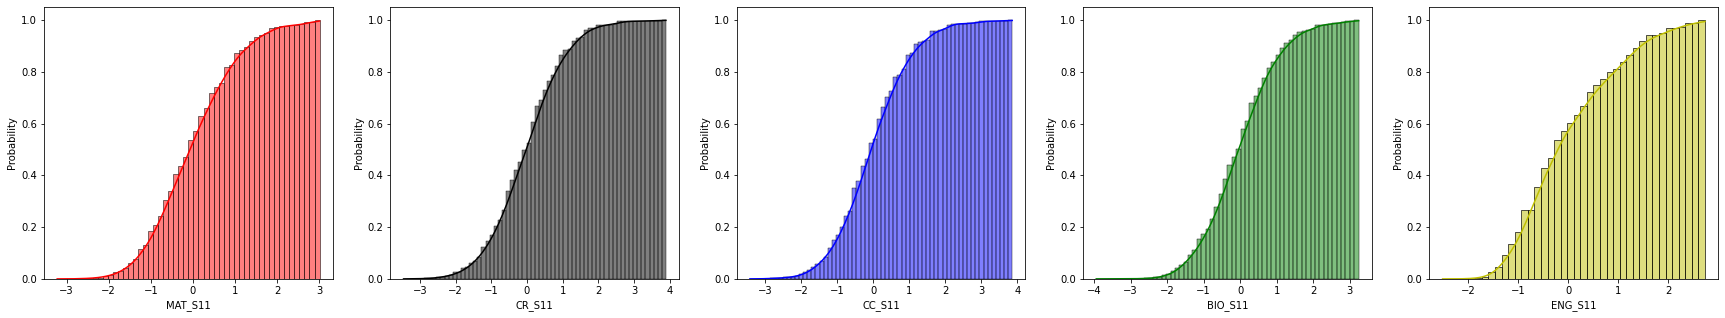

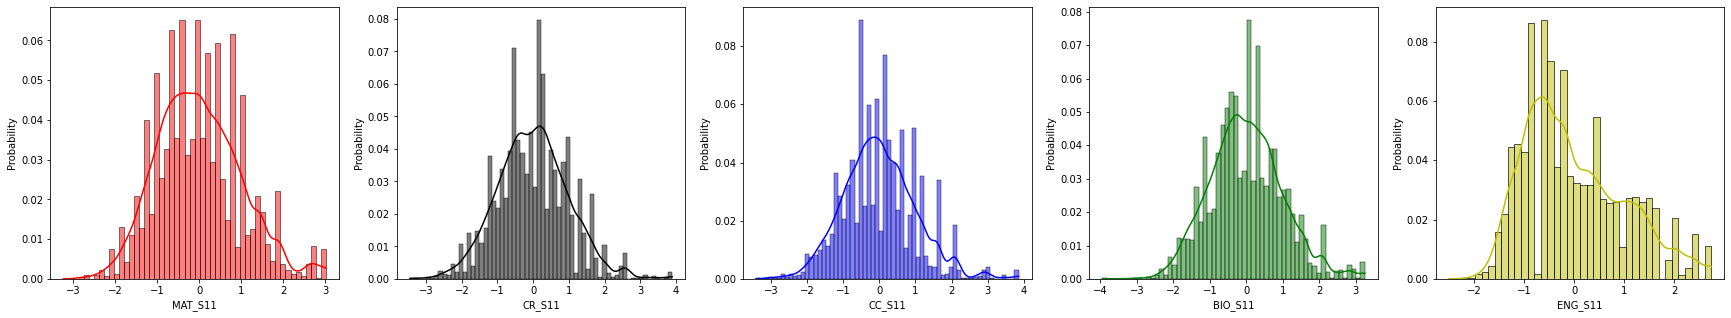

In [ ]:
plt.figure(figsize=[30,5])
clr=iter(['r','k','b','g','y','o','m'])
for i in range(len(subjects)):
  plt.subplot(1, 5, i+1)
  sns.histplot(data[subjects[i]], kde=True,color=next(clr),cumulative=True,stat='probability')

plt.figure(figsize=[30,5])
clr=iter(['r','k','b','g','y','o','m'])
for i in range(len(subjects)):
  plt.subplot(1, 5, i+1)
  sns.histplot(data[subjects[i]],kde=True, color=next(clr), stat='probability')


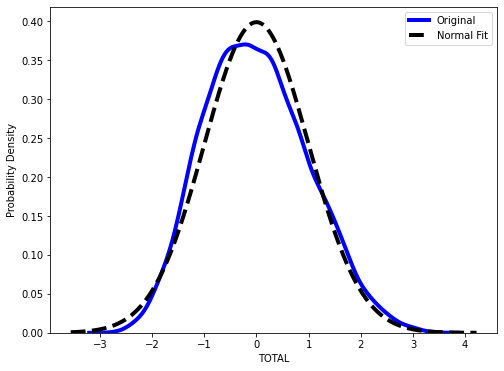

In [ ]:
plt.figure(figsize=[8,6])
sns.kdeplot(data['TOTAL'], color='b',label='Original',linewidth=4)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(data['TOTAL']))
p = norm.pdf(x, data['TOTAL'].mean(), data['TOTAL'].std())
c = norm.cdf(x, data['TOTAL'].mean(), data['TOTAL'].std())
plt.plot(x, p, 'k', linewidth=4,linestyle='--',label='Normal Fit')
plt.ylabel('Probability Density')
plt.legend()

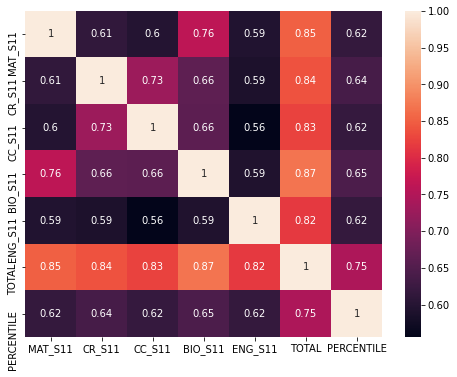

In [ ]:

plt.figure(figsize=[8,6])
subjects.append('TOTAL')
subjects.append('PERCENTILE')
df=data[subjects]
sns.heatmap(df.corr(),annot=True)

In [ ]:
N=(len(data['TOTAL'])-1)*data['TOTAL'].var() + (len(x)-1)*np.var(x)
D= len(data['TOTAL']-1) + len(x)-1
PSD=np.sqrt(N/D)
cohens_d = (mean(data['TOTAL']) - mean(x)) / PSD
abs(cohens_d)

0.32444908061172084

### Effect of Ammenities

<Figure size 3600x360 with 0 Axes>

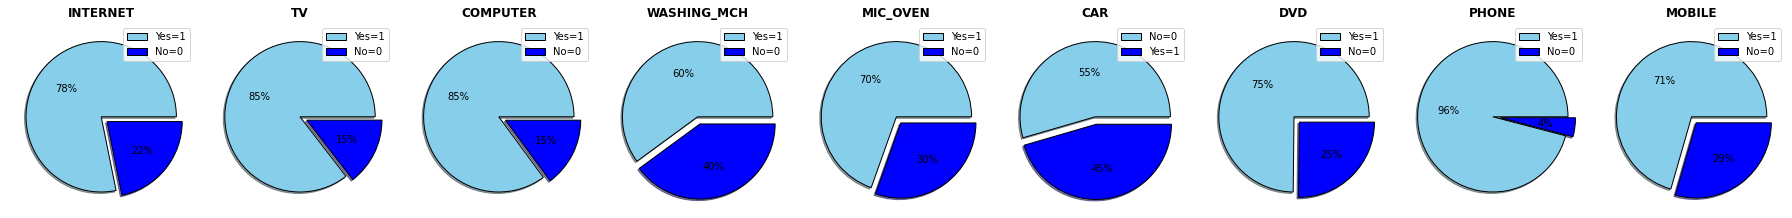

In [ ]:
ammenities=['INTERNET','TV','COMPUTER','WASHING_MCH','MIC_OVEN','CAR','DVD', 'PHONE', 'MOBILE']
plt.figure(figsize=[50,5])
fig, ax = plt.subplots(1,9)

labels = ['Yes=1','No=0']
label = ['No=0','Yes=1']
colors = ['skyblue', 'blue']
explode = (0, 0.1)
arr=[]
for i in range(len(ammenities)):
  arr.append(data[ammenities[i]].value_counts().to_frame().T)
  ax[i].pie(arr[i], colors=colors, wedgeprops={'edgecolor': 'black'},  autopct='%1.f%%',explode=explode, shadow=True)
  ax[i].set_title(ammenities[i], fontweight='bold',loc='center')
  if ammenities[i]=='CAR':
    ax[i].legend(loc='top-right', labels=label, fontsize='medium')
  else:
    ax[i].legend(loc='top-left', labels=labels, fontsize='medium')

fig.set_figheight(10)
fig.set_figwidth(25)
fig.tight_layout()
plt.show()


Boolean to numeric data

In [ ]:
bool2num={'INTERNET':{'Yes':1,'No':0},'TV':{'Yes':1,'No':0},'COMPUTER':{'Yes':1,'No':0},'WASHING_MCH':{'Yes':1,'No':0},
          'MIC_OVEN':{'Yes':1,'No':0},'CAR':{'Yes':1,'No':0},'DVD':{'Yes':1,'No':0}, 'FRESH':{'Yes':1,'No':0},	
          'PHONE':{'Yes':1,'No':0}, 'MOBILE':{'Yes':1,'No':0}}
data3=data.replace(bool2num)


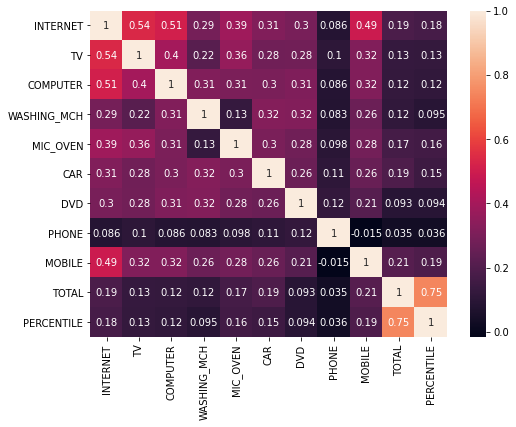

In [ ]:
plt.figure(figsize=[8,6])
ammenities.append('TOTAL')
ammenities.append('PERCENTILE')
df=data3[ammenities]
sns.heatmap(df.corr(),annot=True)

In [ ]:
sum=pd.Series(np.zeros(len(data3)))
for i in range(len(ammenities)-2):
  sum+=data3[ammenities[i]]
data3['Amenities']=sum
data3.head()

,index,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,PHONE,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,ACADEMIC_PROGRAM,PERCENTILE,TOTAL,GradeABS,GradeREL,Amenities
0,0,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,4,4,3,1,1,1,1,0,0,1,1,1,1,0,PRIVATE,ACADEMIC,0.566775,2.006902,0.023969,1.990093,1.459381,INDUSTRIAL ENGINEERING,0.880118,1.451041,BB,AA,7.0
1,1,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,5,4,3,1,1,1,1,1,1,1,1,1,6,0,PRIVATE,ACADEMIC,1.578054,1.410910,0.515219,3.248883,1.884299,INDUSTRIAL ENGINEERING,0.918639,2.094436,AB,AA,9.0
2,2,M,Not sure,Not sure,Independent,Home,2,2,5,0,0,1,1,0,0,1,1,0,1,1,PRIVATE,ACADEMIC,-1.034417,-1.171722,-2.235785,-1.606450,-1.373402,ELECTRONIC ENGINEERING,-2.355680,-1.745184,CD,F,4.0
3,3,F,Not sure,Not sure,Other occupation,Independent,2,4,3,1,1,1,1,1,0,1,1,1,2,0,PRIVATE,ACADEMIC,-0.697324,-0.575730,-0.958533,0.011994,0.822005,INDUSTRIAL ENGINEERING,-0.044396,-0.250845,CC,BC,8.0
4,4,M,Complete professional education,Complete professional education,Executive,Home,4,4,1,1,1,1,1,0,1,1,1,1,5,0,PRIVATE,ACADEMIC,1.325234,0.417590,1.497721,1.900179,2.167577,INDUSTRIAL ENGINEERING,1.149768,1.803871,BB,AA,8.0


In [ ]:
a_df=pd.DataFrame(data3[['Amenities',subjects[0],subjects[1],subjects[2],subjects[3],subjects[4]]].groupby(['Amenities']).agg('mean'))


In [ ]:
subjects=subjects[:len(subjects)-2]

In [ ]:
for i in range(len(subjects)):
  print('{}'.format(subjects[i]),data3[subjects[i]].mean())

MAT_S11 -5.928989193361367e-15
CR_S11 -2.273644029461227e-16
CC_S11 5.991831164956885e-17
BIO_S11 -6.018603519057443e-16
ENG_S11 5.5732363689006376e-15


In [ ]:
a_df

,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11
Amenities,,,,,
0.0,-0.310123,-0.352904,-0.228295,-0.199424,-0.399154
1.0,-0.222059,-0.280542,-0.222178,-0.203735,-0.529072
2.0,-0.242655,-0.243746,-0.233139,-0.220481,-0.513669
3.0,-0.273360,-0.312262,-0.208366,-0.276684,-0.484398
4.0,-0.274517,-0.255802,-0.206541,-0.232130,-0.425307
5.0,-0.175934,-0.151302,-0.110585,-0.130264,-0.266913
6.0,-0.133910,-0.092059,-0.097229,-0.114279,-0.252119
7.0,-0.058328,-0.008640,-0.024928,-0.044974,-0.113728
8.0,0.041131,0.051744,0.039824,0.029559,0.107826


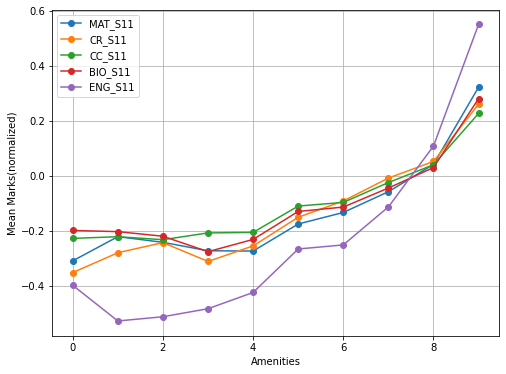

In [ ]:
plt.figure(figsize=[8,6])
clr=iter(['r','g','b','k','m'])
for i in range(len(subjects)):
  plt.plot(a_df[subjects[i]],label=subjects[i],marker='o')
plt.ylabel('Mean Marks(normalized)')
plt.xlabel('Amenities')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# subjects=['MAT_S11', 'CR_S11', 'CC_S11','BIO_S11', 'ENG_S11']
ammenities=ammenities[:len(ammenities)-2]

In [ ]:
data3=data3.drop(ammenities,axis=1)
# data3=data3.drop(subjects,axis=1)
data3.head()

,index,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,ACADEMIC_PROGRAM,PERCENTILE,TOTAL,GradeABS,GradeREL,Amenities
0,0,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,4,4,3,1,0,PRIVATE,ACADEMIC,0.566775,2.006902,0.023969,1.990093,1.459381,INDUSTRIAL ENGINEERING,0.880118,1.451041,BB,AA,7.0
1,1,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,5,4,3,6,0,PRIVATE,ACADEMIC,1.578054,1.410910,0.515219,3.248883,1.884299,INDUSTRIAL ENGINEERING,0.918639,2.094436,AB,AA,9.0
2,2,M,Not sure,Not sure,Independent,Home,2,2,5,1,1,PRIVATE,ACADEMIC,-1.034417,-1.171722,-2.235785,-1.606450,-1.373402,ELECTRONIC ENGINEERING,-2.355680,-1.745184,CD,F,4.0
3,3,F,Not sure,Not sure,Other occupation,Independent,2,4,3,2,0,PRIVATE,ACADEMIC,-0.697324,-0.575730,-0.958533,0.011994,0.822005,INDUSTRIAL ENGINEERING,-0.044396,-0.250845,CC,BC,8.0
4,4,M,Complete professional education,Complete professional education,Executive,Home,4,4,1,5,0,PRIVATE,ACADEMIC,1.325234,0.417590,1.497721,1.900179,2.167577,INDUSTRIAL ENGINEERING,1.149768,1.803871,BB,AA,8.0


In [ ]:
data3['Amenities'].unique()

array([7., 9., 4., 8., 5., 1., 6., 3., 2., 0.])

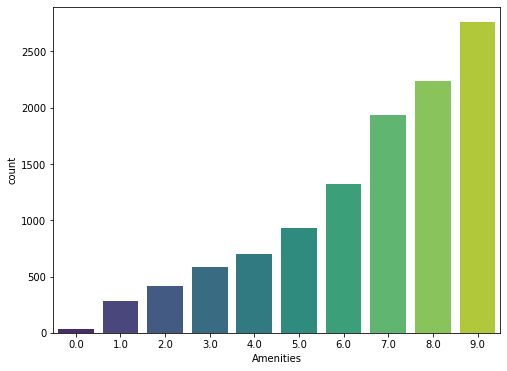

In [ ]:
plt.figure(figsize=[8,6])
sns.countplot(data3['Amenities'],palette='viridis')

### Socio-economic

In [ ]:
data3['STRATUM']=pd.to_numeric(data3['STRATUM'])
data3['SISBEN']=data3['SISBEN'].replace(0,4)

In [ ]:
other=['SISBEN','STRATUM','REVENUE','JOB','SCHOOL_NAT','SCHOOL_TYPE','TOTAL']
df=pd.DataFrame(data3[other],columns=other)

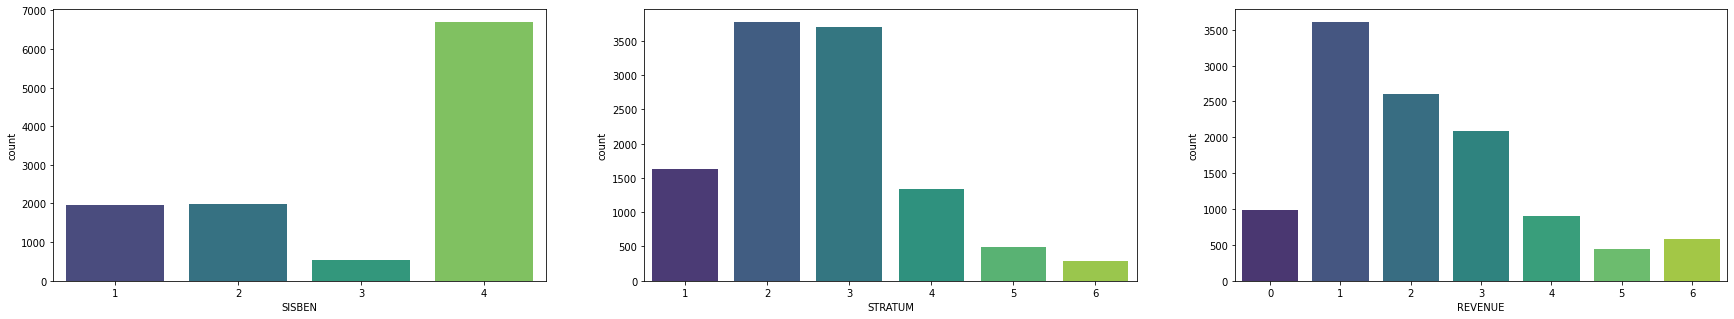

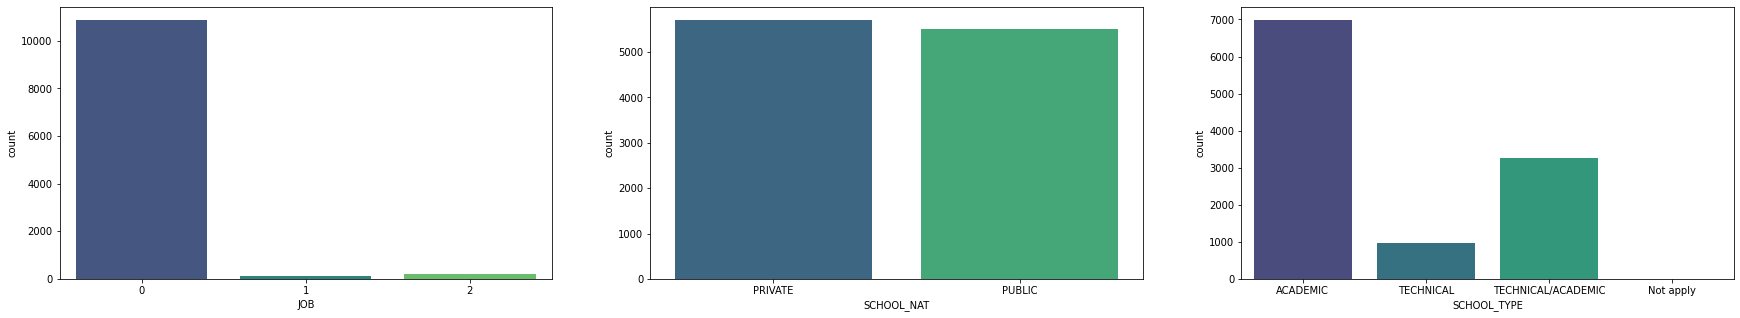

In [ ]:
plt.figure(figsize=[30,5])
clr=iter(['r','k','b','g','y','o','m'])
for i in range(3):
  plt.subplot(1, 3, i+1)
  sns.countplot(df[other[i]],palette='viridis')

plt.figure(figsize=[30,5])
clr=iter(['r','k','b','g','y','o','m'])
for i in range(3,len(other)-1):
  plt.subplot(1,len(other)- 4, i-2)
  sns.countplot(df[other[i]],palette='viridis')

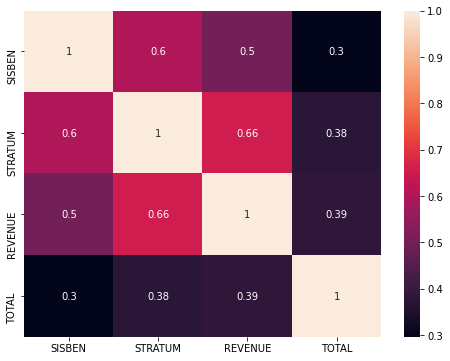

In [ ]:
oo=['SISBEN','STRATUM','REVENUE','TOTAL']
plt.figure(figsize=[8,6])
sns.heatmap(df[oo].corr(),annot=True)

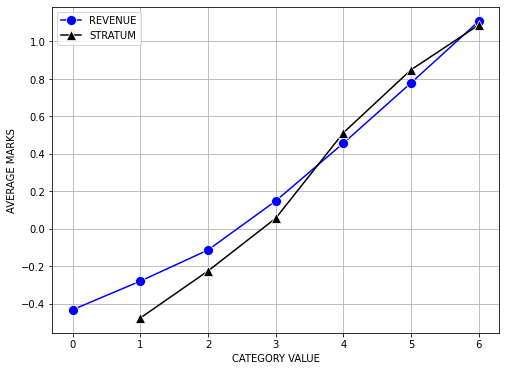

In [ ]:
plt.figure(figsize=[8,6])
temp_df=pd.DataFrame(data3[['REVENUE','TOTAL']].groupby(['REVENUE']).agg('mean'))
sns.lineplot(temp_df.index,temp_df['TOTAL'],color='blue',marker='o',markersize=10,label='REVENUE')
temp_df=pd.DataFrame(data3[['STRATUM','TOTAL']].groupby(['STRATUM']).agg('mean'))
sns.lineplot(temp_df.index,temp_df['TOTAL'],color='k',marker='^',markersize=10,label='STRATUM')

plt.legend()
plt.xlabel('CATEGORY VALUE')
plt.ylabel('AVERAGE MARKS')
plt.grid()


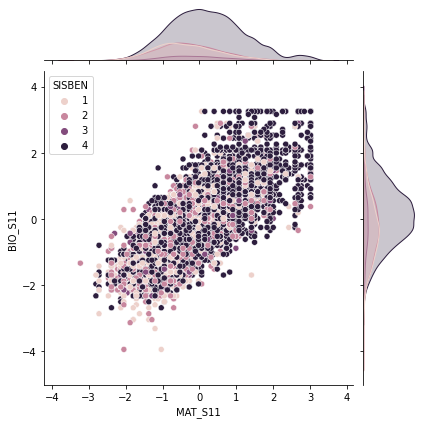

In [ ]:
sns.jointplot(data=data3,x='MAT_S11',y='BIO_S11',hue='SISBEN')

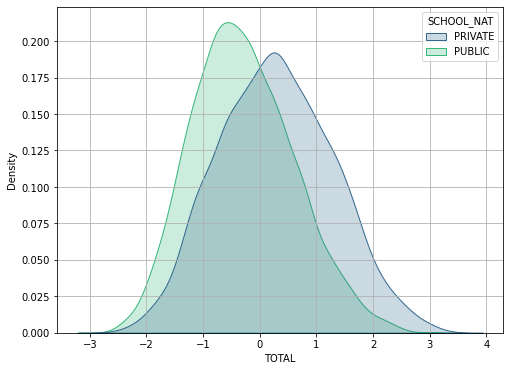

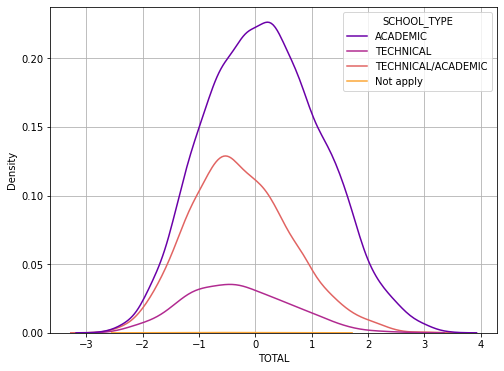

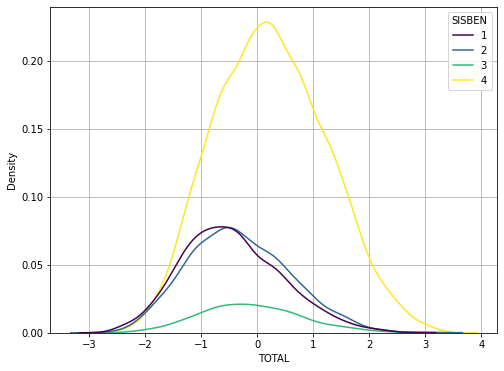

In [ ]:
# sns.jointplot(data=data3,x='MAT_S11',y='BIO_S11',hue='SCHOOL_NAT')
plt.figure(figsize=[8,6])
sns.kdeplot(data=data3,x='TOTAL',hue='SCHOOL_NAT',palette='viridis',shade=True)
plt.grid()

plt.figure(figsize=[8,6])
sns.kdeplot(data=data3,x='TOTAL',hue='SCHOOL_TYPE',palette='plasma')
plt.grid()

plt.figure(figsize=[8,6])
sns.kdeplot(data=data3,x='TOTAL',hue='SISBEN',palette='viridis')
plt.grid()

In [ ]:
data3.head()

,index,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,ACADEMIC_PROGRAM,PERCENTILE,TOTAL,GradeABS,GradeREL,Amenities
0,0,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,4,4,3,1,0,PRIVATE,ACADEMIC,0.566775,2.006902,0.023969,1.990093,1.459381,INDUSTRIAL ENGINEERING,0.880118,1.451041,BB,AA,7.0
1,1,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,5,4,3,6,0,PRIVATE,ACADEMIC,1.578054,1.410910,0.515219,3.248883,1.884299,INDUSTRIAL ENGINEERING,0.918639,2.094436,AB,AA,9.0
2,2,M,Not sure,Not sure,Independent,Home,2,2,5,1,1,PRIVATE,ACADEMIC,-1.034417,-1.171722,-2.235785,-1.606450,-1.373402,ELECTRONIC ENGINEERING,-2.355680,-1.745184,CD,F,4.0
3,3,F,Not sure,Not sure,Other occupation,Independent,2,4,3,2,0,PRIVATE,ACADEMIC,-0.697324,-0.575730,-0.958533,0.011994,0.822005,INDUSTRIAL ENGINEERING,-0.044396,-0.250845,CC,BC,8.0
4,4,M,Complete professional education,Complete professional education,Executive,Home,4,4,1,5,0,PRIVATE,ACADEMIC,1.325234,0.417590,1.497721,1.900179,2.167577,INDUSTRIAL ENGINEERING,1.149768,1.803871,BB,AA,8.0


### Family background

Effect of Education level of Parents on total marks of students

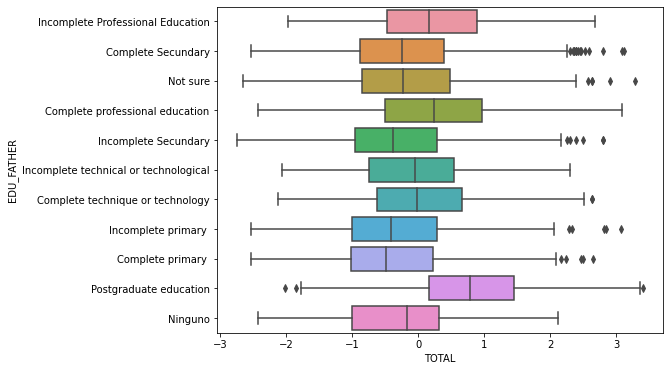

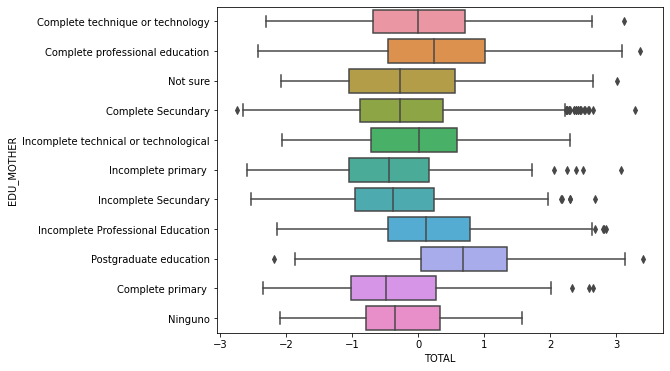

In [ ]:
subjects=['MAT_S11', 'CR_S11','CC_S11', 'BIO_S11', 'ENG_S11']
X=data['TOTAL']#subjects=['Total']
# for X in subjects:
plt.figure(figsize=[8,6])
sns.boxplot(x=X, y='EDU_FATHER', data=data)
plt.show()

plt.figure(figsize=[8,6])
sns.boxplot(x=X, y='EDU_MOTHER', data=data)
plt.show()

In [ ]:
# print(np.sort(data['EDU_FATHER'].unique()))
# print(np.sort(data['EDU_MOTHER'].unique()))
edu_cols={'Ninguno':0,'Not sure':0,'Incomplete primary ':1,'Complete primary ':2,'Incomplete Secundary':3,'Complete Secundary':4,'Incomplete Professional Education':5,
          'Complete professional education':6,'Incomplete technical or technological':7,'Complete technique or technology':8,'Postgraduate education':9}
data3=data3.replace(edu_cols)

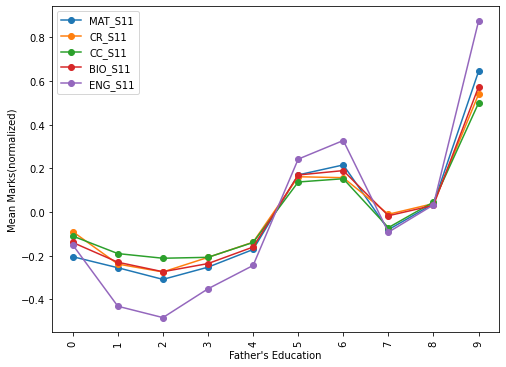

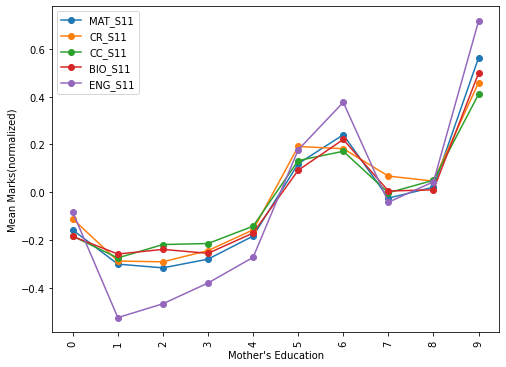

In [ ]:
temp_df=pd.DataFrame(data3[['EDU_FATHER',subjects[0],subjects[1],subjects[2],subjects[3],subjects[4]]].groupby(['EDU_FATHER']).agg('mean'))
plt.figure(figsize=[8,6])
clr=iter(['r','g','b','k','m'])
for i in range(len(subjects)):
  plt.plot(temp_df[subjects[i]],label=subjects[i],marker='o')
plt.ylabel('Mean Marks(normalized)')
plt.xlabel("Father's Education")
plt.xticks(np.arange(len(temp_df.index)),temp_df.index,rotation=90)
plt.legend()
plt.show()

temp_df=pd.DataFrame(data3[['EDU_MOTHER',subjects[0],subjects[1],subjects[2],subjects[3],subjects[4]]].groupby(['EDU_MOTHER']).agg('mean'))
plt.figure(figsize=[8,6])
clr=iter(['r','g','b','k','m'])
for i in range(len(subjects)):
  plt.plot(temp_df[subjects[i]],label=subjects[i],marker='o')
plt.ylabel('Mean Marks(normalized)')

plt.xlabel("Mother's Education")
plt.xticks(np.arange(len(temp_df.index)),temp_df.index,rotation=90)
plt.legend()
plt.show()

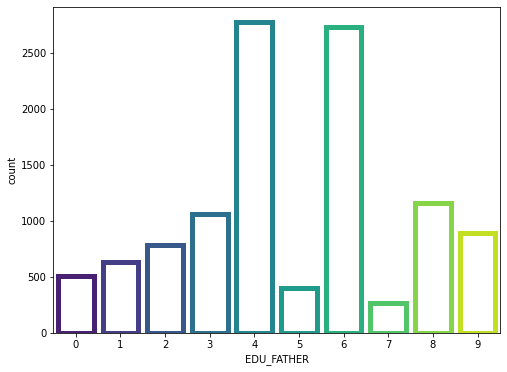

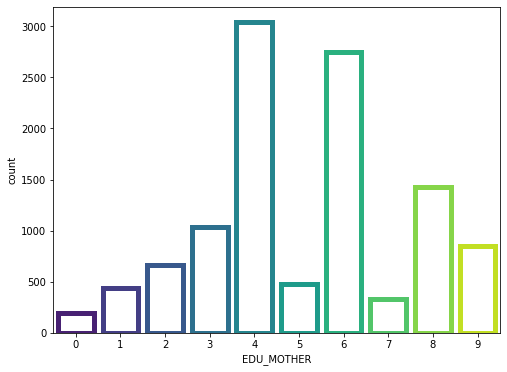

In [ ]:
plt.figure(figsize=[8,6])
sns.countplot(data3['EDU_FATHER'],  facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("viridis", len(data3['EDU_FATHER'].unique())))
# plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=[8,6])
sns.countplot(data3['EDU_MOTHER'],  facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("viridis", len(data3['EDU_MOTHER'].unique())))
# plt.xticks(rotation=90)
plt.show()


Occupation of parents

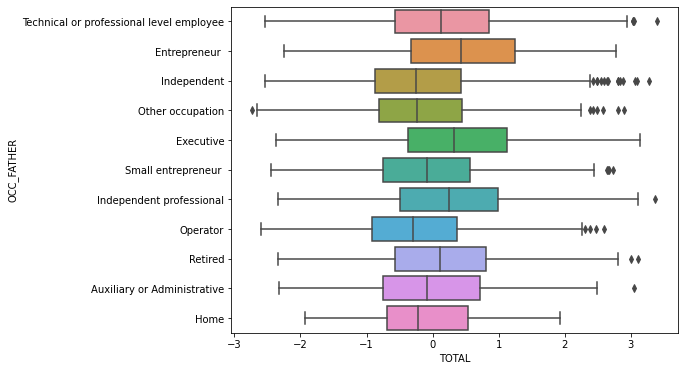

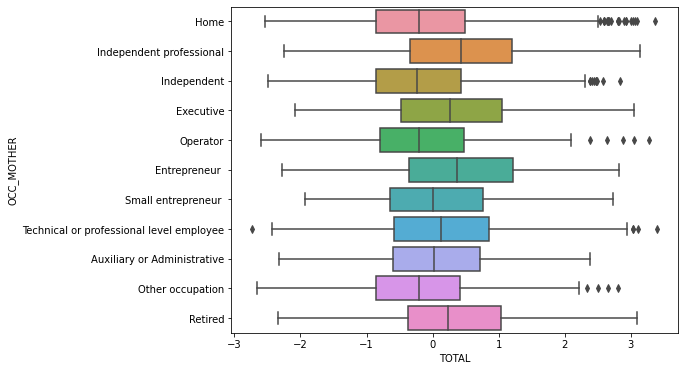

In [ ]:
subjects=['MAT_S11', 'CR_S11','CC_S11', 'BIO_S11', 'ENG_S11']
X=data['TOTAL']#subjects=['Total']
# for X in subjects:
plt.figure(figsize=[8,6])
sns.boxplot(x=X, y='OCC_FATHER', data=data)
plt.show()

plt.figure(figsize=[8,6])
sns.boxplot(x=X, y='OCC_MOTHER', data=data)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data3['OCC_FATHER'] =le.fit_transform(data3['OCC_FATHER'])
data3['OCC_MOTHER'] =le.fit_transform(data3['OCC_MOTHER'])
# occ_cols={'Auxiliary or Administrative':0,'Entrepreneur ':1,'Executive':2, 'Home':3, 
# 'Independent':4,'Independent professional':5,'Operator ':6, 'Other occupation':7,
# 'Retired':8,'Small entrepreneur ':9, 'Technical or professional level employee':10}
# data3=data3.replace(occ_cols)

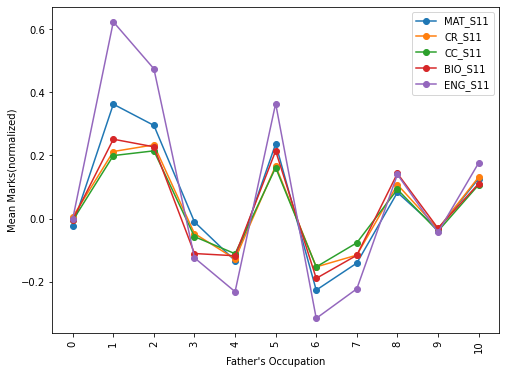

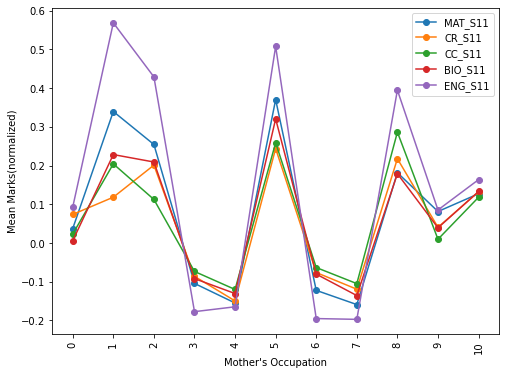

In [ ]:
temp_df=pd.DataFrame(data3[['OCC_FATHER',subjects[0],subjects[1],subjects[2],subjects[3],subjects[4]]].groupby(['OCC_FATHER']).agg('mean'))

plt.figure(figsize=[8,6])
clr=iter(['r','g','b','k','m'])
for i in range(len(subjects)):
  plt.plot(temp_df[subjects[i]],label=subjects[i],marker='o')
plt.ylabel('Mean Marks(normalized)')
plt.xlabel("Father's Occupation")
plt.xticks(np.arange(len(temp_df.index)),temp_df.index,rotation=90)
plt.legend()
plt.show()


temp_df=pd.DataFrame(data3[['OCC_MOTHER',subjects[0],subjects[1],subjects[2],subjects[3],subjects[4]]].groupby(['OCC_MOTHER']).agg('mean'))
plt.figure(figsize=[8,6])
clr=iter(['r','g','b','k','m'])
for i in range(len(subjects)):
  plt.plot(temp_df[subjects[i]],label=subjects[i],marker='o')
plt.ylabel('Mean Marks(normalized)')
plt.xlabel("Mother's Occupation")
plt.xticks(np.arange(len(temp_df.index)),temp_df.index,rotation=90)
plt.legend()
plt.show()

In [ ]:
data3.head()

,index,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,ACADEMIC_PROGRAM,PERCENTILE,TOTAL,GradeABS,GradeREL,Amenities
0,0,F,5,8,10,3,4,4,3,1,0,PRIVATE,ACADEMIC,0.566775,2.006902,0.023969,1.990093,1.459381,INDUSTRIAL ENGINEERING,0.880118,1.451041,BB,AA,7.0
1,1,F,4,6,1,5,5,4,3,6,0,PRIVATE,ACADEMIC,1.578054,1.410910,0.515219,3.248883,1.884299,INDUSTRIAL ENGINEERING,0.918639,2.094436,AB,AA,9.0
2,2,M,0,0,4,3,2,2,5,1,1,PRIVATE,ACADEMIC,-1.034417,-1.171722,-2.235785,-1.606450,-1.373402,ELECTRONIC ENGINEERING,-2.355680,-1.745184,CD,F,4.0
3,3,F,0,0,7,4,2,4,3,2,0,PRIVATE,ACADEMIC,-0.697324,-0.575730,-0.958533,0.011994,0.822005,INDUSTRIAL ENGINEERING,-0.044396,-0.250845,CC,BC,8.0
4,4,M,6,6,2,3,4,4,1,5,0,PRIVATE,ACADEMIC,1.325234,0.417590,1.497721,1.900179,2.167577,INDUSTRIAL ENGINEERING,1.149768,1.803871,BB,AA,8.0


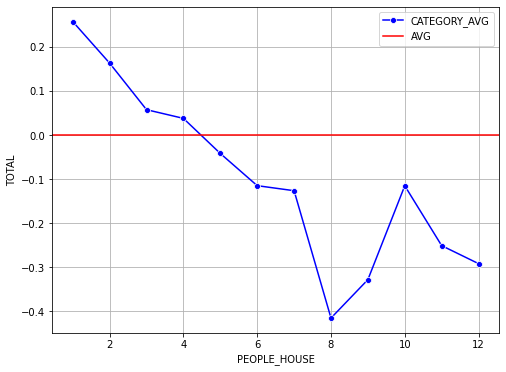

In [ ]:
plt.figure(figsize=[8,6])
temp_df=pd.DataFrame(data3[['PEOPLE_HOUSE','TOTAL']].groupby(['PEOPLE_HOUSE']).agg('mean'))
sns.lineplot(temp_df.index,temp_df['TOTAL'],color='blue',marker='o',label='CATEGORY_AVG')
plt.axhline(y=data3['TOTAL'].mean(), c='r',label='AVG')
plt.legend()
plt.grid()

### Grade

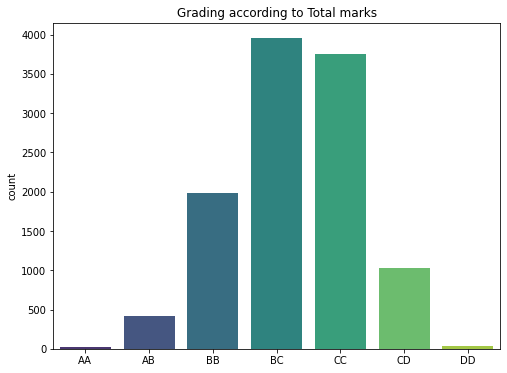

Text(0.5, 1.0, 'Grading according to Percentile')

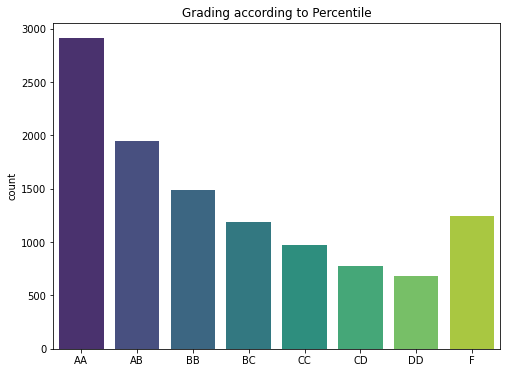

In [ ]:
plt.figure(figsize=[8,6])
sns.countplot(np.sort(data3['GradeABS']),palette='viridis')
plt.title('Grading according to Total marks')
plt.show()

plt.figure(figsize=[8,6])
sns.countplot(np.sort(data3['GradeREL']),palette='viridis')
plt.title('Grading according to Percentile')

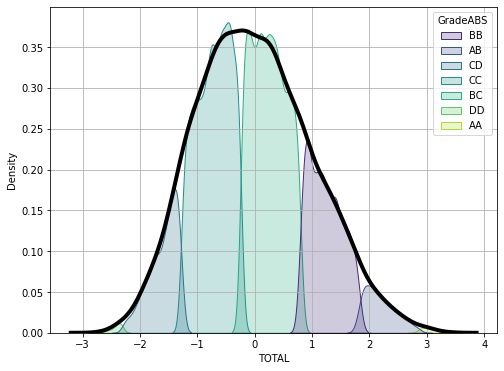

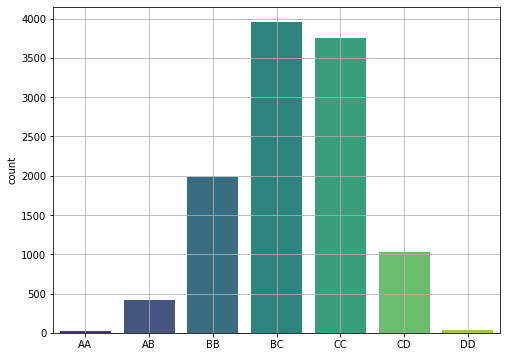

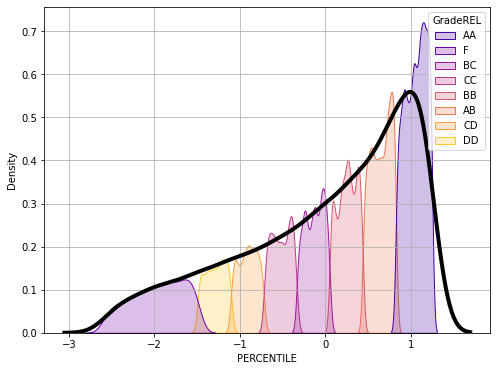

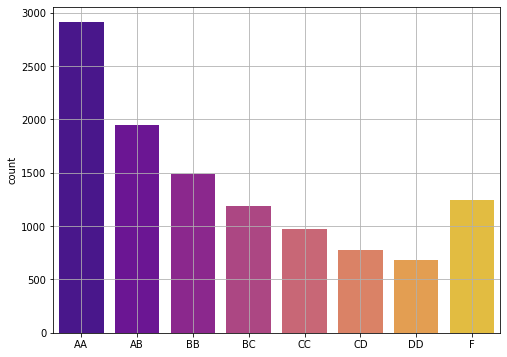

In [ ]:
# sns.jointplot(data=data3,x='MAT_S11',y='BIO_S11',hue='SCHOOL_NAT')
plt.figure(figsize=[8,6])
sns.kdeplot(data=data3,x='TOTAL',hue='GradeABS',palette='viridis',shade=True)
sns.kdeplot(data3['TOTAL'],color='k',linewidth=4)
plt.grid()

plt.figure(figsize=[8,6])
sns.countplot(np.sort(data3['GradeABS']),palette='viridis')
plt.grid()


plt.figure(figsize=[8,6])

sns.kdeplot(data=data3,x='PERCENTILE',hue='GradeREL',palette='plasma',shade=True)
sns.kdeplot(data3['PERCENTILE'],color='k',linewidth=4)
plt.grid()

plt.figure(figsize=[8,6])
sns.countplot(np.sort(data3['GradeREL']),palette='plasma')
plt.grid()


### Gender

In [ ]:
data.head()

,index,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,PHONE,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,ACADEMIC_PROGRAM,PERCENTILE,TOTAL,GradeABS,GradeREL
0,0,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,4,4,3,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,1,0,PRIVATE,ACADEMIC,0.566775,2.006902,0.023969,1.990093,1.459381,INDUSTRIAL ENGINEERING,0.880118,1.451041,BB,AA
1,1,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,5,4,3,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,6,0,PRIVATE,ACADEMIC,1.578054,1.410910,0.515219,3.248883,1.884299,INDUSTRIAL ENGINEERING,0.918639,2.094436,AB,AA
2,2,M,Not sure,Not sure,Independent,Home,2,2,5,No,No,Yes,Yes,No,No,Yes,Yes,No,1,1,PRIVATE,ACADEMIC,-1.034417,-1.171722,-2.235785,-1.606450,-1.373402,ELECTRONIC ENGINEERING,-2.355680,-1.745184,CD,F
3,3,F,Not sure,Not sure,Other occupation,Independent,2,4,3,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,PRIVATE,ACADEMIC,-0.697324,-0.575730,-0.958533,0.011994,0.822005,INDUSTRIAL ENGINEERING,-0.044396,-0.250845,CC,BC
4,4,M,Complete professional education,Complete professional education,Executive,Home,4,4,1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,5,0,PRIVATE,ACADEMIC,1.325234,0.417590,1.497721,1.900179,2.167577,INDUSTRIAL ENGINEERING,1.149768,1.803871,BB,AA


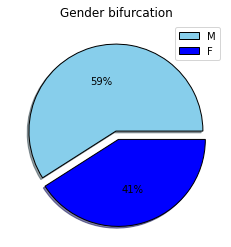

In [ ]:
colors = ['skyblue', 'blue']
explode = (0, 0.1)
plt.pie(data3['GENDER'].value_counts(), colors=colors, wedgeprops={'edgecolor': 'black'},  autopct='%1.f%%', explode=explode, shadow=True)
plt.title('Gender bifurcation',loc='center', color='black')
plt.legend(labels=['M','F'])

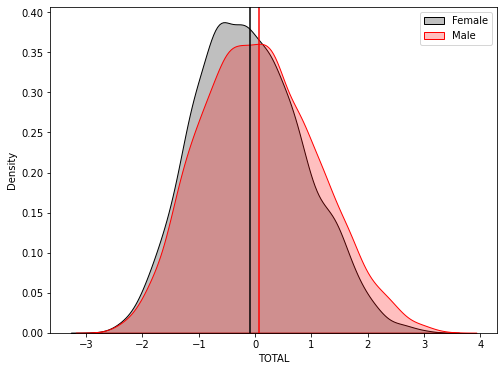

In [ ]:
  plt.figure(figsize=[8,6])
  f=data3[data3['GENDER']=='F']['TOTAL']
  m=data3[data3['GENDER']=='M']['TOTAL']
  # sns.jointplot(data=data,x='MAT_S11',y='BIO_S11',hue='GENDER',palette='viridis')
  sns.kdeplot(x=f,label='Female',color='k',shade=True)
  sns.kdeplot(x=m,label='Male',color='r',shade=True)
  plt.axvline(x=f.mean(),color='k')
  plt.axvline(x=m.mean(),color='r')
plt.legend()

In [ ]:
def Ztest(X1, X2, sd1, sd2, n1, n2,zvalue):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)*sqrt(1/n1 + 1/n2)
    zl = (X1 - X2) - zvalue*pooledSE
    zr = (X1 - X2) + zvalue*pooledSE
    return round(zl, 4),round(zr, 4)

0.3314 0.3329


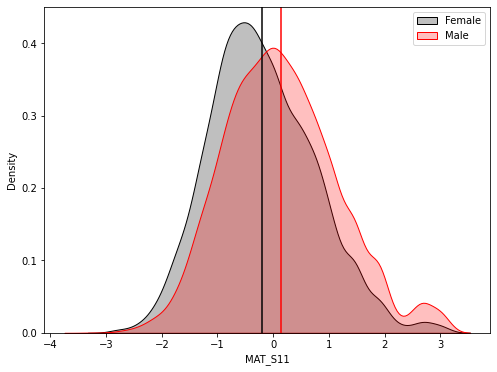

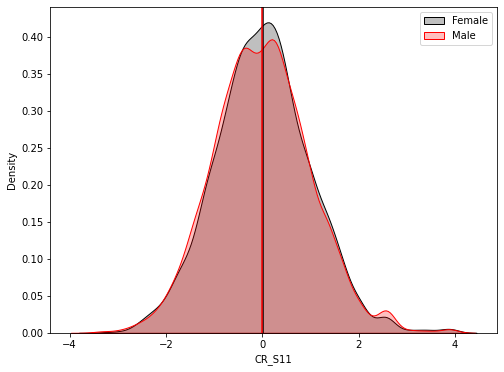

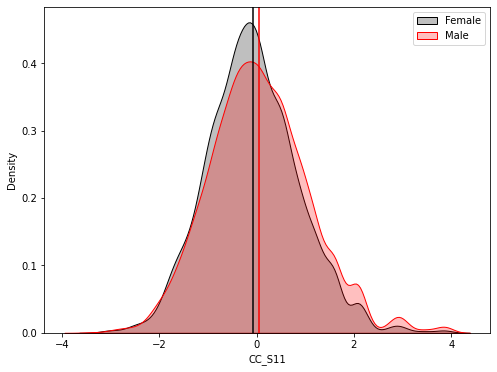

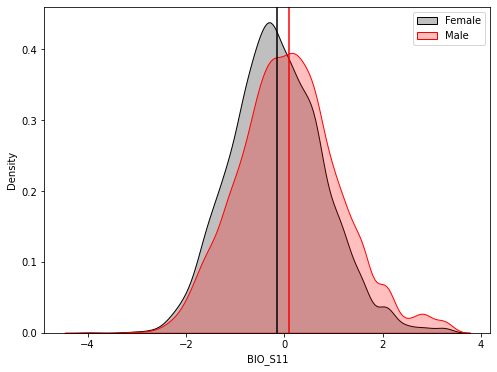

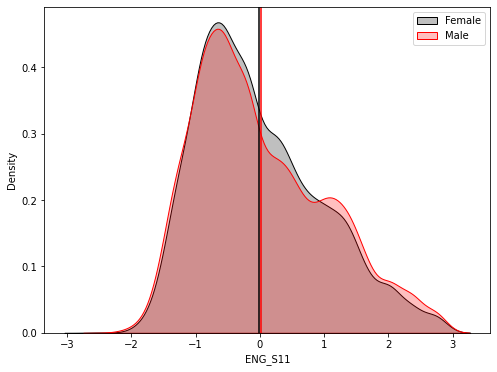

In [ ]:
for I in subjects:
  plt.figure(figsize=[8,6])
  f=data3[data3['GENDER']=='F'][I]
  m=data3[data3['GENDER']=='M'][I]
  # sns.jointplot(data=data,x='MAT_S11',y='BIO_S11',hue='GENDER',palette='viridis')
  sns.kdeplot(x=f,label='Female',color='k',shade=True)
  sns.kdeplot(x=m,label='Male',color='r',shade=True)
  plt.axvline(x=f.mean(),color='k')
  plt.axvline(x=m.mean(),color='r')
  plt.legend()
  if I=='MAT_S11':
    z,p=Ztest(m.mean(),f.mean(),m.std(),f.std(),len(f),len(m),1.960)
    print(z,p)


In [ ]:
data3=data3.drop(subjects,axis=1)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11207 entries, 0 to 11206
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             11207 non-null  int64  
 1   GENDER            11207 non-null  object 
 2   EDU_FATHER        11207 non-null  int64  
 3   EDU_MOTHER        11207 non-null  int64  
 4   OCC_FATHER        11207 non-null  int64  
 5   OCC_MOTHER        11207 non-null  int64  
 6   STRATUM           11207 non-null  int64  
 7   SISBEN            11207 non-null  int64  
 8   PEOPLE_HOUSE      11207 non-null  int64  
 9   REVENUE           11207 non-null  int64  
 10  JOB               11207 non-null  int64  
 11  SCHOOL_NAT        11207 non-null  object 
 12  SCHOOL_TYPE       11207 non-null  object 
 13  ACADEMIC_PROGRAM  11207 non-null  object 
 14  PERCENTILE        11207 non-null  float64
 15  TOTAL             11207 non-null  float64
 16  GradeABS          11207 non-null  object

### Comment over the resemblance to normal distribution

In [ ]:
x=np.linspace(xmin,xmax,len(data3['TOTAL']))
c = norm.cdf(x, data3['TOTAL'].mean(), data3['TOTAL'].std())

In [ ]:
temp= data3['TOTAL'].copy()
temp=np.sort(np.array(temp))
H,X1 = np.histogram(temp, bins =len(x), normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx

In [ ]:
len(F1),len(c)

(11207, 11207)

In [ ]:
print(stats.ks_2samp(F1,c))
print(stats.kstest(F1,'norm'))

Ks_2sampResult(statistic=0.09654680110645131, pvalue=8.571327840068621e-46)
KstestResult(statistic=0.5000355975979185, pvalue=0.0)


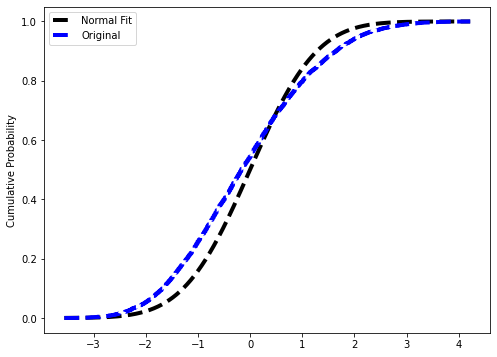

In [ ]:
plt.figure(figsize=[8,6])
# sns.kdeplot(data['G_SC'], color='b',label='Original',linewidth=4,cumulative=True)
# xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(c))
plt.plot(x,c, 'k', linewidth=4,linestyle='--',label='Normal Fit')
plt.plot(x,F1, 'b', linewidth=4,linestyle='--',label='Original')
plt.ylabel('Cumulative Probability')
plt.legend()

In [ ]:
ans=get_best_distribution(data3['TOTAL'])

p value for norm = 5.860962685964111e-12
p value for exponweib = 0.0048501329302681456
p value for weibull_max = 0.008932991875510983
p value for weibull_min = 0.00031232743642878395
p value for pareto = 0.0
p value for genextreme = 0.008896165086451037
p value for genlogistic = 2.0732261791758618e-23
p value for gumbel_l = 2.5853068243883106e-63




Best fitting distribution: weibull_max
Best p value: 0.008932991875510983
Parameters for the best fit: (5.01826494989751, 4.3485907564370425, 4.738149264607435)
